<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/05_find_tuning_transfer_learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer learning with Tensorflow : Fine-tuning

In [2]:
## Creating helper functions:
## So it's a good idea to put functions you'll want to use again in a script you can download and import into your notebook

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-12 01:12:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-12 01:12:16 (82.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
#Import heper functions we're going to use in this book

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Let's get some data

In [5]:
# Get 10% of training data of Food101

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2022-01-12 01:12:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.99.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   143MB/s    in 1.1s    

2022-01-12 01:12:20 (143 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
#check out how many images and subdirectories are in the directory
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [7]:
#Create training and test directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [9]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = image_dataset_from_directory(directory = train_dir,
                                                     image_size = IMG_SIZE,
                                                     batch_size = BATCH_SIZE,
                                                     label_mode = 'categorical')

test_data_10_percent = image_dataset_from_directory(directory = test_dir,
                                                    image_size = IMG_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent 

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.47142859e+01 9.71428585e+00 3.71428561e+00]
   [1.68571434e+01 1.18571434e+01 5.85714340e+00]
   [1.50000000e+01 1.00000000e+01 4.00000000e+00]
   ...
   [2.32142639e+01 1.22142639e+01 8.21426392e+00]
   [2.37857265e+01 1.27857275e+01 8.78572750e+00]
   [2.42295437e+01 1.32295446e+01 9.94383049e+00]]

  [[1.63112259e+01 1.13112240e+01 5.31122494e+00]
   [1.59285717e+01 1.09285717e+01 4.92857170e+00]
   [1.48010206e+01 9.80102062e+00 3.80102015e+00]
   ...
   [2.95867558e+01 1.65867558e+01 1.01888371e+01]
   [2.58571301e+01 1.28571301e+01 6.85713005e+00]
   [2.66174145e+01 1.36174145e+01 7.61741447e+00]]

  [[1.55714283e+01 1.10000000e+01 4.78571415e+00]
   [1.26581631e+01 8.08673477e+00 1.87244856e+00]
   [1.67857132e+01 1.22142859e+01 6.00000000e+00]
   ...
   [3.06173420e+01 1.62142639e+01 8.66327763e+00]
   [2.91581535e+01 1.45867252e+01 7.37243891e+00]
   [2.94949245e+01 1.49234972e+01 7.70921135e+00]]

  ...

  [[2.22918411e+02 1.91918411e+02 1.37918411e+02]
   [2

In [13]:
#functional API is more flexible compared to Sequential API
#Feature extraction

#1. Create a model with tf.keras.application
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create inputs into our model

inputs =tf.keras.layers.Input(shape = (224,224,3) , name = 'input_layer')

# when you use ResNet50V2 you will beed to normalize inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass the inputs to the base_model
x = base_model(inputs)
print(f'shape after passing inputs through base model : {x.shape}')

#Average pool the outputs of the base model(Aggregate all the most important information . reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D:{x.shape}')

outputs = tf.keras.layers.Dense(10, activation = 'softmax' , name = 'output_layer')(x)

# combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_0 = model_0.fit(train_data_10_percent ,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data_10_percent ,
                        validation_steps =int(0.25*len(test_data_10_percent)),
                        callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning_part_2' , 
                                                                 experiment_name = 'model_0')])

16719872/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning_part_2/model_0/20220112-011227
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 84s 3s/step - loss: 1.9378 - accuracy: 0.3653 - val_loss: 1.3992 - val_accuracy: 0.6711
Epoch 2/5
24/24 [==============================] - 76s 3s/step - loss: 1.1504 - accuracy: 0.7347 - val_loss: 0.9527 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - 75s 3s/step - loss: 0.8425 - accuracy: 0.7947 - val_loss: 0.7739 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 76s 3s/step - loss: 0.6874 - accuracy: 0.8467 - val_loss: 0.6984 - val_accuracy: 0.8306
Epoch 5/5
24/24 [==============================] - 75s 3s/step - loss: 0.6043 - accuracy: 0.8467 - val_loss: 0.6369 - val_accuracy: 0.8372


In [14]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 115s 1s/step - loss: 0.6073 - accuracy: 0.8448


[0.6072911620140076, 0.8447999954223633]

In [15]:
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [16]:
#How about we get a summary of the base mode?
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [17]:
#How about a summary of our whole model?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


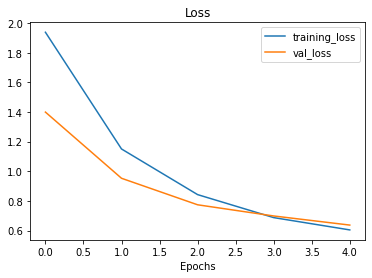

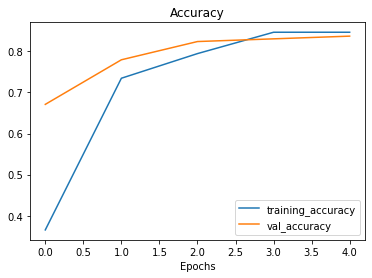

In [18]:
plot_loss_curves(history_0)

### Getting a feature vector from a trained model

Let's demonstrate the global average pooling 2D layer

Let's use a similar shaped tensor of (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [19]:
# Define the input shape

input_shape = (1,4,4,3)

#create a random_tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:{input_tensor}\n')

# pass the random tensor through a global average 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global averaged pooled random tensor:{global_average_pooled_tensor}\n')

print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of input tensor: {global_average_pooled_tensor.shape}')

Random input tensor:[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global averaged pooled random tensor:[[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of input tensor: (1, 3)


In [20]:
#Let's replicate the GlobalAveragePool2D layer 
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [21]:
input_shape = (1,4,4,3)

#create a random_tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:{input_tensor}\n')

# pass the random tensor through a global average 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f'2D global averaged pooled random tensor:{global_max_pooled_tensor}\n')

print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of input tensor: {global_max_pooled_tensor.shape}')

Random input tensor:[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global averaged pooled random tensor:[[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of input tensor: (1, 3)


In [22]:
tf.reduce_max(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

#What is a feature vector?

A feature vector is a learned representation of the input data (a compressed form of the input data based on how the model sees it)

In [23]:
## Running a series of transfer learning experiments
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-01-12 01:21:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   147MB/s    in 0.9s    

2022-01-12 01:21:04 (147 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [24]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir_1_percent = '10_food_classes_1_percent/test'

In [25]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There a

In [26]:
#setup data loaders
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical',
                                                                           batch_size = BATCH_SIZE)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          image_size = IMG_SIZE,
                                                                          label_mode = 'categorical',
                                                                          batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Benefits of data augmentation inside the model are :

* Preprocessing of images (augmenting them) happens on the GPU (much faster) rather than the CPU

* Image data augmentation only happens during training , so we can still export our whole model and use it elsewhere.


In [27]:
## Adding data augmentation into the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [28]:
data_augmentation = keras.Sequential([
                                      preprocessing.RandomFlip('horizontal'),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2)

], name = 'data_augmentation') # automically turned on during training , and turned off during testing

### Visualize our data augmentation layer ( and see what happens to our data)


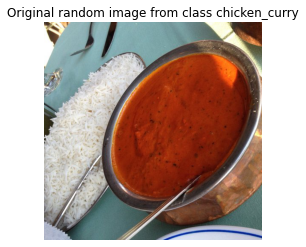

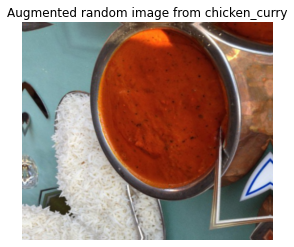

In [29]:
# View a random image and compare it to its augmented version

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' +random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f'Original random image from class {target_class}')

# Now let's plot our augmented random image

augmented_img = data_augmentation(tf.expand_dims(img, axis = 0)) #data augmentation expects 4 dims , img has only 3 
plt.figure()
plt.axis(False)
plt.title(f'Augmented random image from {target_class}')
plt.imshow(tf.squeeze(augmented_img)/255.) # image not normalized, imshow requires normalized image

### Model 1: Feature extraction transfer learning on 1% of data with augmentation:
 

In [30]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
#inputs = layers.Input(shape=input_shape, name="input_layer")
inputs =tf.keras.layers.Input(shape = (224,224,3) , name = 'input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data_10_percent,
                    validation_steps=int(0.25* len(test_data_10_percent)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning_part_2", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning_part_2/1_percent_data_aug/20220112-012110
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 41s 16s/step - loss: 2.4140 - accuracy: 0.1143 - val_loss: 2.2442 - val_accuracy: 0.1546
Epoch 2/5
3/3 [==============================] - 45s 21s/step - loss: 2.1491 - accuracy: 0.2286 - val_loss: 2.1182 - val_accuracy: 0.2418
Epoch 3/5
3/3 [==============================] - 33s 16s/step - loss: 2.0006 - accuracy: 0.4000 - val_loss: 2.0000 - val_accuracy: 0.3158
Epoch 4/5
3/3 [==============================] - 44s 21s/step - loss: 1.8210 - accuracy: 0.4857 - val_loss: 1.9210 - val_accuracy: 0.3602
Epoch 5/5
3/3 [==============================] - 44s 21s/step - loss: 1.6971 - accuracy: 0.6000 - val_loss: 1.8360 - val_accuracy: 0.4046


In [31]:
model_1.evaluate(test_data_10_percent)

79/79 [==============================] - 119s 1s/step - loss: 1.8332 - accuracy: 0.4428


[1.8332284688949585, 0.44279998540878296]

In [31]:
plot_loss_curve(history)

In [45]:
#1. import data.
#2. visualize data
#3. preprocessing
#4. build model
#5. evaluate
#

In [32]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'


#create data loader
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = image_dataset_from_directory(directory = train_dir,
                                                     image_size = IMG_SIZE,
                                                     batch_size = BATCH_SIZE,
                                                     label_mode = 'categorical')

test_data_10_percent = image_dataset_from_directory(directory = test_dir,
                                                    image_size = IMG_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    label_mode = 'categorical')


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
                                         preprocessing.RandomFlip('horizontal'),
                                         preprocessing.RandomHeight(0.2),
                                         preprocessing.RandomWidth(0.2),
                                         preprocessing.RandomZoom(0.2),
                                         preprocessing.RandomRotation(0.2)
                                         #preprocessing.Rescaling(1./255) efficient net has rescaling, use rescaling if there isn't 
], name = 'data_augmentation')

In [47]:
input_shape = (224,224,3)
#setup base model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#setup inputs
inputs = tf.keras.layers.Input(shape = input_shape,
                               name = 'input_layer')

#data augmentation
x = data_augmentation(inputs)
x = base_model(x , training = False) # pass augmented data to model

#pool output features
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)

#put a dense layer as output
outputs = keras.layers.Dense(10 , activation = 'softmax', name = 'output_layer')(x)

#build model
model_2 = keras.Model(inputs, outputs)

#compile model

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create a model checkpoint callback

it can intermediately save our models (the full model or just the weights) during training.

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
#initiallize checkpoint file name
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'
# Create a model checkpoint callback that saves the mode's weights only
checkpoint_callback = ModelCheckpoint(filepath = checkpoint_path,
                                      save_weights_only = True,
                                      save_best_only = True,
                                      save_freq = 'epoch', #save every epoch,
                                      verbose = 1)

In [95]:
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                        steps_per_epoch = len(train_data_10_percent),
                        epochs = initial_epochs,
                        validation_data = test_data_10_percent,
                        validation_steps = int(0.25*len(test_data_10_percent)),
                        callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning_part_2',
                                                                 experiment_name = 'train_10percent_augmented'),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning_part_2/train_10percent_augmented/20220112-031356
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


TypeError: ignored

In [55]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 144s 2s/step - loss: 0.6073 - accuracy: 0.8448


[0.6072912812232971, 0.8447999954223633]

In [56]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 144s 2s/step - loss: 0.5885 - accuracy: 0.8352


[0.5885218381881714, 0.8352000117301941]

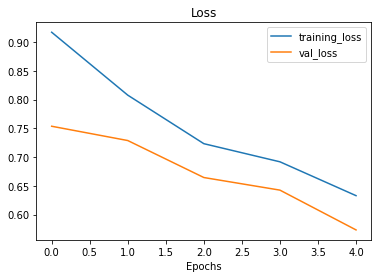

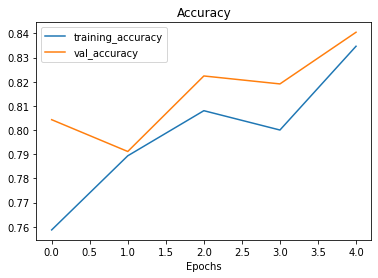

In [54]:
plot_loss_curves(history_2)

# Loading in checkpointed weights
Loading  in checked pointed weights returns a model to a specific checkpoint

In [96]:
# load in saved model weights and evaluate_model
model_2.load_weights(checkpoint_path)

In [97]:
loaded_weights_model_results = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 127s 2s/step - loss: 0.5885 - accuracy: 0.8352


## Model 3 : Fine tuning existing model

>Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

- typical work flow -> trained freeze model
- load in trained model, and unfreeze some layers and retrain


In [98]:
model_2.load_weights(checkpoint_path)

In [99]:
model_2.layers

In [100]:
#Are the layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f07de9c6690> True
<keras.engine.sequential.Sequential object at 0x7f07daecd210> True
<keras.engine.functional.Functional object at 0x7f07d307af10> True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f07cf43b310> True
<keras.layers.core.dense.Dense object at 0x7f07d3118d90> True


In [101]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer,layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7f07cf48ff90> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f07cf44f9d0> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f07cf3f3c90> False
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f07cba7c650> False
4 <keras.layers.convolutional.Conv2D object at 0x7f07d23bf590> False
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f07d05d3510> False
6 <keras.layers.core.activation.Activation object at 0x7f07cf4307d0> False
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f07cf426410> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f07cf408550> False
9 <keras.layers.core.activation.Activation object at 0x7f07cf4084d0> False
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f07d0611310> False
11 <keras.layers.core.reshape.Reshape object at 0x7f07cf3c1350> False
12 <keras.layers.convo

In [102]:
#how many trainable variables are in our base models?
print(len(model_2.layers[2].trainable_variables))

10


In [103]:
#To begin fine-tuning , let's start by setting the last 10 layers of our base_model.trainable.
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

#recompile (we have to recompile our model every time we make a change)
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
#When fine tuning we wouldn't want to change the trainable layers too much - as that will result in  overfitting
#a rule of thumb is to reduce the learning rate by 10x -reference UML fit paper
                metrics = ['accuracy'])

A rule of thumb is to reduce the learning rate by 10x -reference UML fit paper
reference : https://arxiv.org/abs/1801.06146

In [104]:
#check which layers are trainable
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number , layer.name , layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [105]:
print(len(model_2.trainable_variables))

12


In [107]:
fine_tune_epochs = initial_epochs + 5

history_3 = model_2.fit(train_data_10_percent,
                        steps_per_epoch = len(train_data_10_percent),
                        epochs = fine_tune_epochs,
                        initial_epoch = history_2.epoch[-1],
                        validation_data = test_data_10_percent,
                        validation_steps = int(0.25*len(test_data_10_percent)),
                        callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning_part_2',
                                                                 experiment_name = 'finetuning_10percent_augmented'),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning_part_2/finetuning_10percent_augmented/20220112-031707
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 0.5036 - accuracy: 0.8533
Epoch 00005: val_loss improved from inf to 0.50115, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 89s 4s/step - loss: 0.5036 - accuracy: 0.8533 - val_loss: 0.5012 - val_accuracy: 0.8372
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.4571 - accuracy: 0.8533
Epoch 00006: val_loss did not improve from 0.50115
24/24 [==============================] - 85s 4s/step - loss: 0.4571 - accuracy: 0.8533 - val_loss: 0.5247 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.8840
Epoch 00007: val_loss did not improve from 0.50115
24/24 [==============================] - 76s 3s/step - loss: 0.4014 - accuracy: 0.8840 - val_loss: 0.5419 - val_accuracy: 0.8240
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8960
Epoch 00008: val_loss im

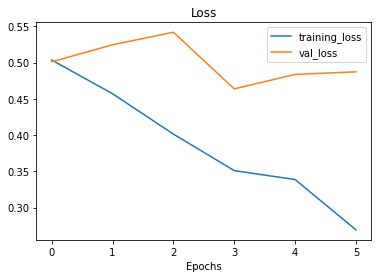

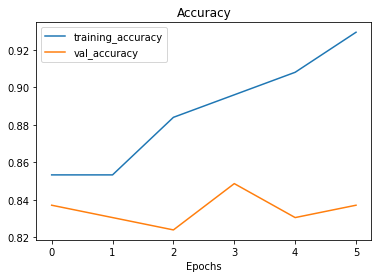

In [108]:
plot_loss_curves(history_3)

Create a function to compare training histories

In [124]:
def compare_history(original_history , new_history,initial_epochs = 5):
  '''
  compare two tensorflow history objects
  '''
  acc= original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc= original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  #combine original history history metrics with new history metrics
  total_acc = acc+new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  val_total_acc = acc+new_history.history['val_accuracy']
  val_total_loss = loss + new_history.history['val_loss']

  #make plots
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label = 'Training accuracy')
  plt.plot(val_total_acc, label = 'Val acccuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label = 'Start Fine Tuning')
  plt.legend(loc = 'lower right'),
  plt.title('Training and Validation Accuracy')


    #make plots
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label = 'Training loss')
  plt.plot(val_total_loss, label = 'Val loss')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label = 'Start Fine Tuning')
  plt.legend(loc = 'lower right'),
  plt.title('Training and Validation Accuracy')

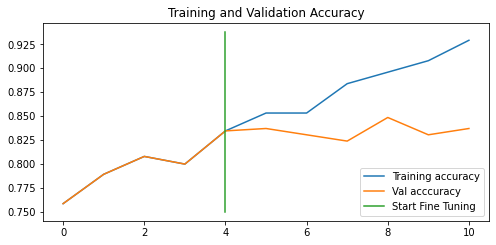

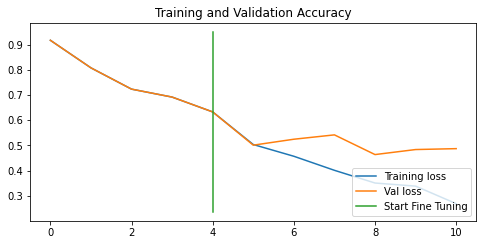

In [125]:
compare_history(history_2,history_3,initial_epochs = 5)

In [126]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2022-01-12 03:55:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   145MB/s    in 3.5s    

2022-01-12 03:56:03 (140 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [127]:
full_10_data_train_dir = '10_food_classes_all_data/train'
full_10_data_test_dir = '10_food_classes_all_data/test'

In [128]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [179]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)

train_data_full = image_dataset_from_directory(directory = train_dir,
                                               image_size = IMG_SIZE,
                                               batch_size = BATCH_SIZE,
                                               label_mode = 'categorical')

test_data_full = image_dataset_from_directory(directory = test_dir,
                                               image_size = IMG_SIZE,
                                               batch_size = BATCH_SIZE,
                                               label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [130]:
model_2.load_weights(checkpoint_path)

In [131]:
model_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [135]:
#Are the layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f07de9c6690> True
<keras.engine.sequential.Sequential object at 0x7f07daecd210> True
<keras.engine.functional.Functional object at 0x7f07d307af10> True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f07cf43b310> True
<keras.layers.core.dense.Dense object at 0x7f07d3118d90> True


In [136]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 125s 2s/step - loss: 0.4714 - accuracy: 0.8480


[0.471406489610672, 0.8479999899864197]

In [137]:
for layer_number , layer in enumerate(model_2.layers):
  print(layer_number , layer.name , layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling True
4 output_layer True


In [140]:
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number , layer.name , layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [141]:
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

In [145]:
fine_tune_epochs = initial_epochs + 5

history_4 = model_2.fit(train_data_full,
                        epochs = fine_tune_epochs,
                        validation_data = test_data_10_percent,
                        validation_steps = int(0.25*len(test_data_10_percent)),
                        steps_per_epoch = len(train_data_full),
                        initial_epoch = initial_epochs,
                        callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning_part_2',
                                                                 experiment_name = 'full_data'),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning_part_2/full_data/20220112-040937
Epoch 6/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


79/79 [==============================] - ETA: 0s - loss: 0.5991 - accuracy: 0.8012
Epoch 00006: val_loss improved from 0.46381 to 0.41428, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
79/79 [==============================] - 191s 2s/step - loss: 0.5991 - accuracy: 0.8012 - val_loss: 0.4143 - val_accuracy: 0.8668
Epoch 7/10
79/79 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.8396
Epoch 00007: val_loss improved from 0.41428 to 0.35791, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
79/79 [==============================] - 197s 2s/step - loss: 0.4961 - accuracy: 0.8396 - val_loss: 0.3579 - val_accuracy: 0.8832
Epoch 8/10
79/79 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.8552
Epoch 00008: val_loss improved from 0.35791 to 0.30378, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
79/79 [==============================] - 197s 2s/step - loss: 0.4403 - accuracy: 0.8552 - v

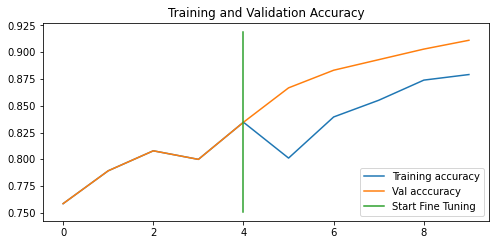

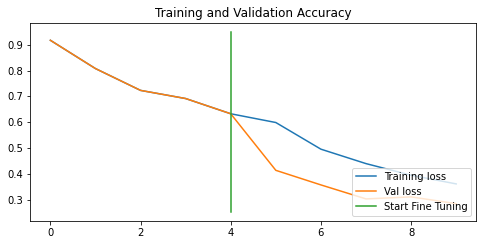

In [147]:
compare_history(original_history = history_2,
                 new_history = history_4,
                 initial_epochs = 5)

In [149]:
import pandas as pd
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.917061,0.758667,0.753644,0.804276
1,0.807698,0.789333,0.728796,0.791118
2,0.723327,0.808000,0.664494,0.822368
3,0.691821,0.800000,0.642586,0.819079
4,0.632970,0.834667,0.573417,0.840461


##View our experiment data to TensorBoar

In [163]:
!tensorboard dev upload --log_dir ./transfer_learning_part_2\
 --name '10 food classes'\
 --description 'a series of experiments with varying amount of data and fine-tuning'\
 --one_shot

2022-01-12 04:49:05.530671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Error: Must specify directory to upload via `--logdir`.


In [164]:
#!tensorboard dev li#st
#!tensorboard dev delete -- experiment_id xxxxxxxx

In [166]:
from tensorflow.keras.layers.experimental import  preprocessing

In [169]:
data_augmentation = tf.keras.Sequential([preprocessing.RandomWidth(0.2),
                                         preprocessing.RandomHeight(0.2),
                                         preprocessing.RandomFlip('horizontal'),
                                         preprocessing.RandomRotation(0.2)
])

In [173]:
#setup new base model
base_model = tf.keras.applications.EfficientNetB4(include_top = False)
base_model.trainable = False

#setup inputs
inputs = keras.layers.Input(shape = (224,224,3), name = 'input_layer')
#pass input layers to base model
x = data_augmentation(inputs)
x = base_model(x,training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = 'average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_lay')(x)

model_5 = keras.Model(inputs,outputs)

In [175]:
from tensorflow.keras.callbacks import ModelCheckpoint

new_checkpoint_path = 'new_model_checkpoints_weights/checkpoint.ckpt'
checkpoint_callback_1 = ModelCheckpoint(filepath = new_checkpoint_path,
                                        save_weights_only = True,
                                        save_best_only = True)

In [176]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

model_5.fit(train_data_10_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data_10_percent,
            validation_steps = int(0.25*len(test_data_10_percent)),
            callbacks = [checkpoint_callback_1])

Epoch 1/5
24/24 [==============================] - 222s 9s/step - loss: 1.8982 - accuracy: 0.4120 - val_loss: 1.2723 - val_accuracy: 0.7401
Epoch 2/5
24/24 [==============================] - 200s 8s/step - loss: 1.2009 - accuracy: 0.7147 - val_loss: 0.8954 - val_accuracy: 0.7780
Epoch 3/5
24/24 [==============================] - 200s 8s/step - loss: 0.9392 - accuracy: 0.7507 - val_loss: 0.7379 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 202s 9s/step - loss: 0.7970 - accuracy: 0.7893 - val_loss: 0.6614 - val_accuracy: 0.8174
Epoch 5/5
24/24 [==============================] - 203s 9s/step - loss: 0.7168 - accuracy: 0.8093 - val_loss: 0.6146 - val_accuracy: 0.8191


In [177]:
model_5.load_weights(new_checkpoint_path)

In [178]:
#To begin fine-tuning , let's start by setting the last 10 layers of our base_model.trainable.
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

#recompile (we have to recompile our model every time we make a change)
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
#When fine tuning we wouldn't want to change the trainable layers too much - as that will result in  overfitting
#a rule of thumb is to reduce the learning rate by 10x -reference UML fit paper
                metrics = ['accuracy'])

In [ ]:
initial_epochs = 5
fine_tuning_epochs = initial_epochs + 5
new_history = model_5.fit(train_data_full,
                          epochs = fine_tuning_epochs,
                          steps_per_epoch = len(train_data_full),
                          validation_data = test_data_10_percent,
                          validation_steps = int(0.25*len(test_data_10_percent)),
                          initial_epoch = initial_epochs,
                          callbacks = [checkpoint_callback_1]
                          )

Epoch 6/10
 6/24 [======>.......................] - ETA: 1:27 - loss: 0.5967 - accuracy: 0.8438